![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg"
     style="width:50px; height:30px; float: right; margin: 0 40px 40px 40px;">
     
# **IRIS FLOWER CLASSIFICATION**
      Iris Classifier Overview  
        ✅ Built 4 models (Logistic, KNN, Decision Tree, SVM)  
        📈 Evaluated accuracy, confusion, F1  
        💾 Saved models for reuse  

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 1️⃣ Data Loading

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



In [165]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3, linewidth=100)
sns.set()

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
file_path = '/content/drive/MyDrive/Colab Notebooks/IrisClassification/Iris.csv'

# 2️⃣ Exploratory Data Analysis (EDA)
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [168]:
df = pd.read_csv(file_path)
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [169]:
df.shape

(150, 6)

In [170]:
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [172]:
Total_species = df['Species'].unique()
counts_species = df['Species'].value_counts()
print(f"Unique values in Species: {Total_species}")
print(f"The amount of count of species: {counts_species}")

Unique values in Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The amount of count of species: Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [173]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## **What are we trying to solve?**
We are developing a multiclass classification model to predict flower species. The model utilizes the attributes of sepal length and sepal width as features for this prediction.

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>, <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

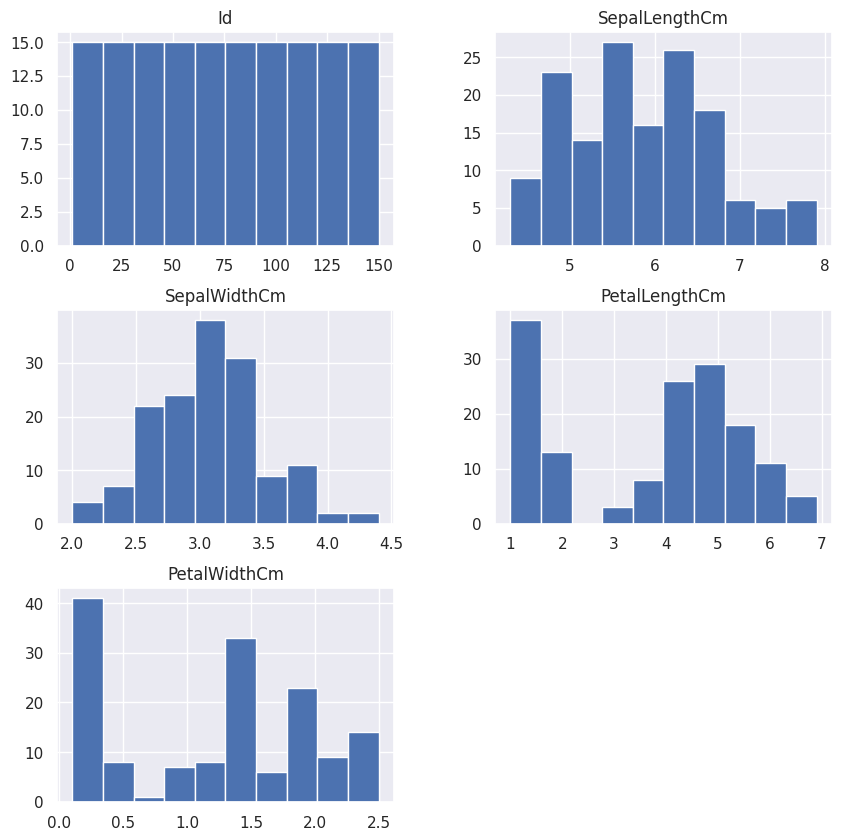

In [174]:
df.hist(figsize=(10,10))

<Axes: >

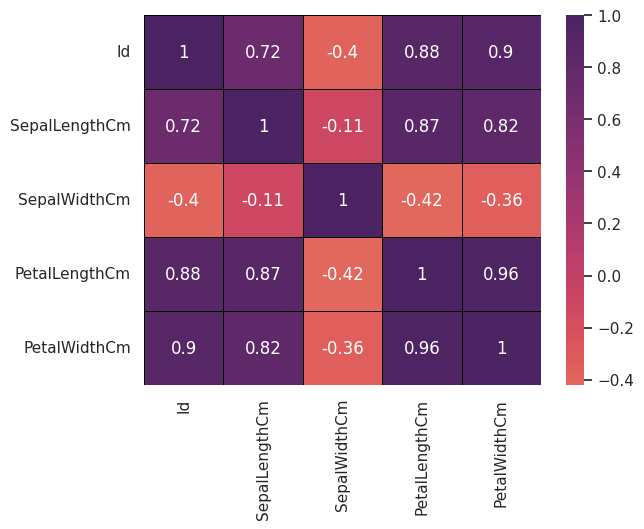

In [175]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="flare", center=0, linewidths=.5, linecolor='black')

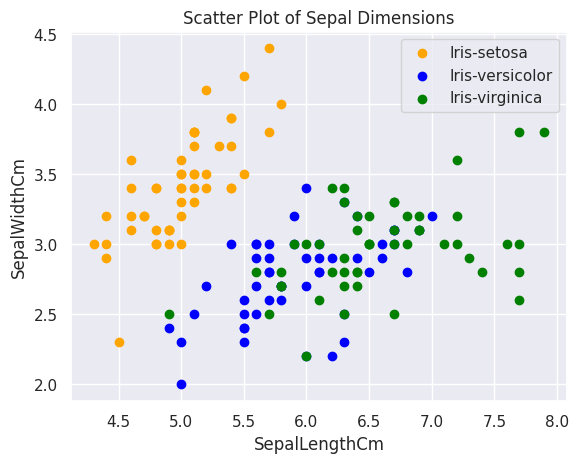

In [176]:
colors = {
    'Iris-setosa': 'orange',
    'Iris-versicolor': 'blue',
    'Iris-virginica': 'green'
}

# Plot each species separately
for species, color in colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(x=subset['SepalLengthCm'], y=subset['SepalWidthCm'], label=species, color=color)

# Labels and title
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title("Scatter Plot of Sepal Dimensions")
plt.legend()
plt.show()


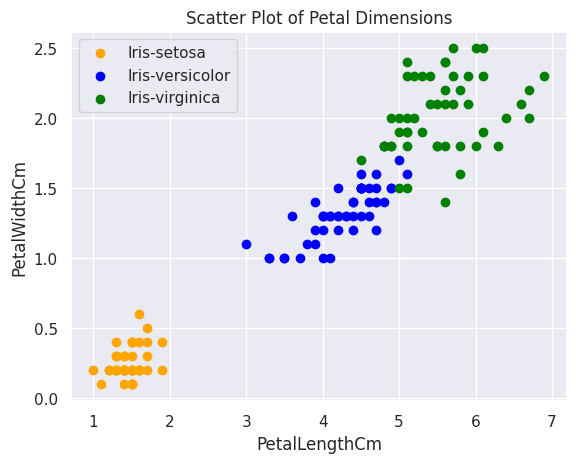

In [177]:
# Plot each species separately
for species, color in colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(x=subset['PetalLengthCm'], y=subset['PetalWidthCm'], label=species, color=color)

# Labels and title
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title("Scatter Plot of Petal Dimensions")
plt.legend()
plt.show()


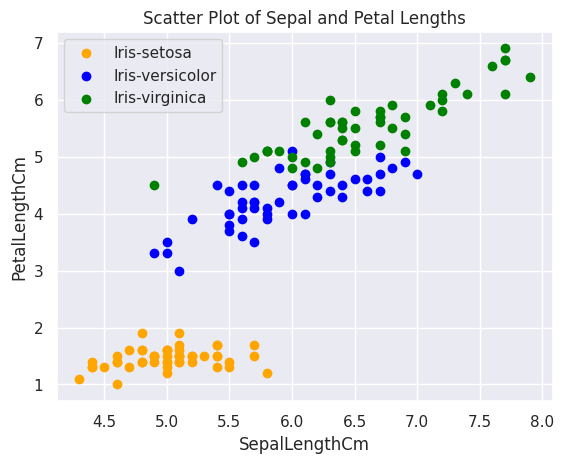

In [178]:
# Plot each species separately
for species, color in colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(x=subset['SepalLengthCm'], y=subset['PetalLengthCm'], label=species, color=color)

# Labels and title
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title("Scatter Plot of Sepal and Petal Lengths")
plt.legend()
plt.show()


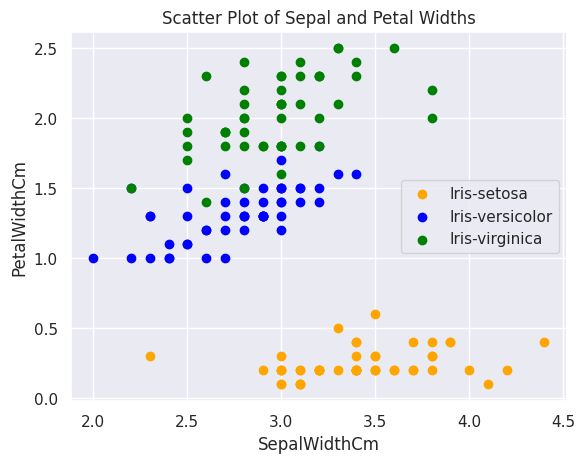

In [179]:
# Plot each species separately
for species, color in colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(x=subset['SepalWidthCm'], y=subset['PetalWidthCm'], label=species, color=color)

# Labels and title
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.title("Scatter Plot of Sepal and Petal Widths")
plt.legend()
plt.show()


# 3️⃣ Preprocessing & Train/Test Split
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Train_Test_Split

In [181]:
# Input and output
X = df.drop(columns=['Species', 'Id'])
Y = df['Species']

# Split the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Scale AFTER splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'X trained scaled data peek\n', X_train_scaled[0:4,:])
print(f'X trained scaled data peek\n', X_test_scaled[0:4,:])

X trained scaled data peek
 [[-1.018  1.306 -1.395 -1.359]
 [-0.773  2.464 -1.337 -1.493]
 [-0.037 -0.777  0.748  0.921]
 [ 0.208  0.843  0.401  0.518]]
X trained scaled data peek
 [[ 0.331 -0.546  0.517 -0.018]
 [-0.16   1.769 -1.221 -1.225]
 [ 2.293 -1.009  1.791  1.457]
 [ 0.208 -0.314  0.401  0.384]]


# 4️⃣ Model Training
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

**Logestic Regression**

In [182]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, Y_train)
log_reg_accuracy = log_reg.score(X_test_scaled, Y_test)

print(f'Logistic Regression Accuracy: {log_reg_accuracy:.2%}')

Logistic Regression Accuracy: 100.00%


## K-Neighbours Classifier

In [183]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can try different k values
knn.fit(X_train_scaled, Y_train)
knn_acc = knn.score(X_test_scaled, Y_test)
print(f'K-Nearest Neighbors Accuracy: {knn_acc:.2%}')

K-Nearest Neighbors Accuracy: 100.00%


## Decision Trees

In [184]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, Y_train)
dtree_acc = dtree.score(X_test_scaled, Y_test)
print(f'Decision Tree Accuracy: {dtree_acc:.2%}')


Decision Tree Accuracy: 100.00%


## SVM

In [185]:
svm = SVC(kernel='linear')  # You can also try 'rbf' or 'poly'
svm.fit(X_train_scaled, Y_train)
svm_acc = svm.score(X_test_scaled, Y_test)
print(f'Support Vector Machine Accuracy: {svm_acc:.2%}')


Support Vector Machine Accuracy: 97.37%


# 5️⃣ Evaluation & Visualization
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## **Comparision by confusion Matrix**

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

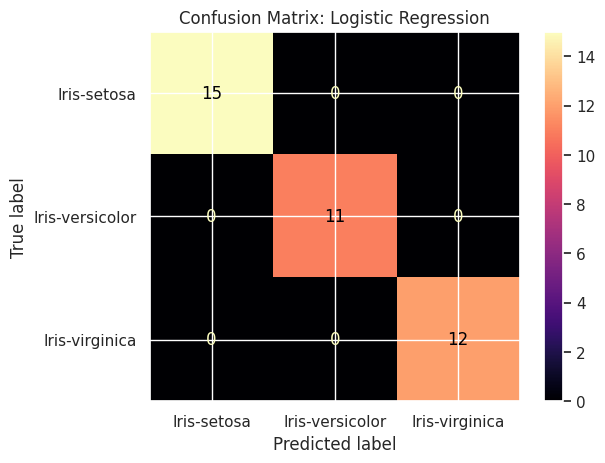

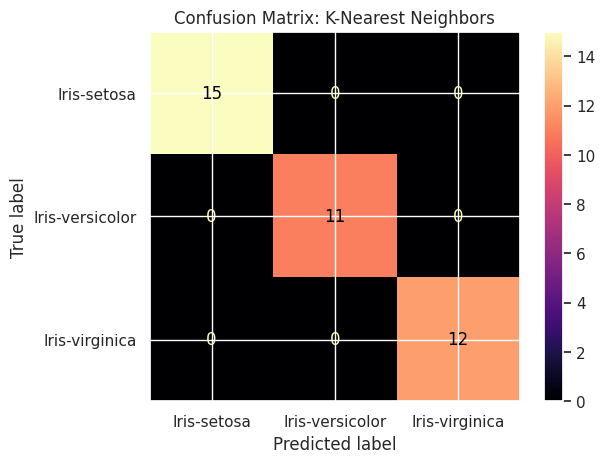

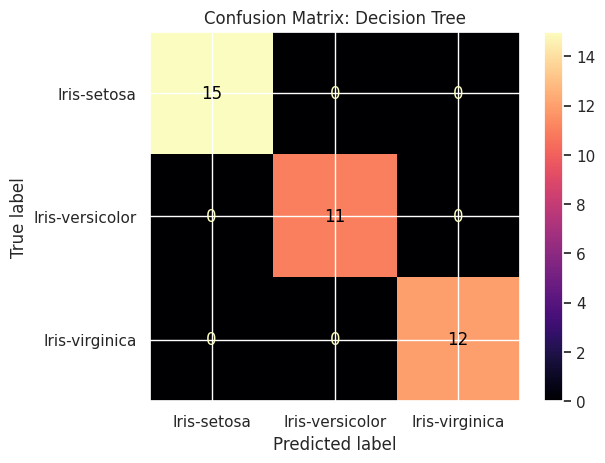

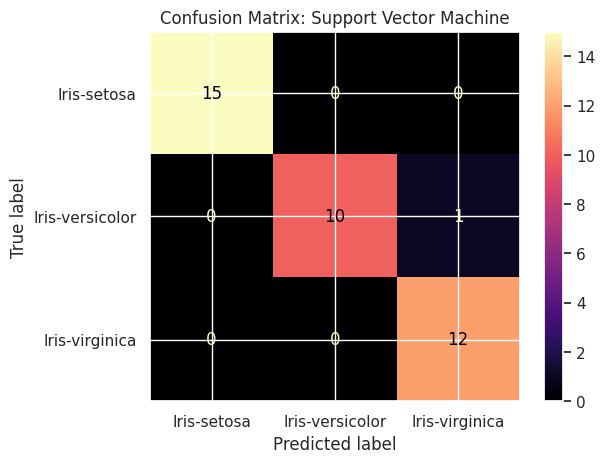

In [187]:
models = {
    "Logistic Regression": log_reg,
    "K-Nearest Neighbors": knn,
    "Decision Tree": dtree,
    "Support Vector Machine": svm
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)  # Predict using test data
    cm = confusion_matrix(Y_test, y_pred)  # Build confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='magma')  # Plot with color
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


## Classification Report

In [188]:
from sklearn.metrics import classification_report

In [189]:
models = {
    "Logistic Regression": log_reg,
    "K-Nearest Neighbors": knn,
    "Decision Tree": dtree,
    "Support Vector Machine": svm
}

for name, model in models.items():
    print(f"\n📋 Classification Report: {name}")
    y_pred = model.predict(X_test_scaled)
    print(classification_report(Y_test, y_pred, target_names=model.classes_))



📋 Classification Report: Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38


📋 Classification Report: K-Nearest Neighbors
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38


📋 Classification Report: Decision Tree
                 precision    recall  f1-score   support

    Ir

In [190]:
models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "Decision Tree": dtree,
    "SVM": svm
}

# Store F1-scores in a dict
f1_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, y_pred, output_dict=True)
    f1_scores[name] = {
        'setosa': report['Iris-setosa']['f1-score'],
        'versicolor': report['Iris-versicolor']['f1-score'],
        'virginica': report['Iris-virginica']['f1-score']
    }


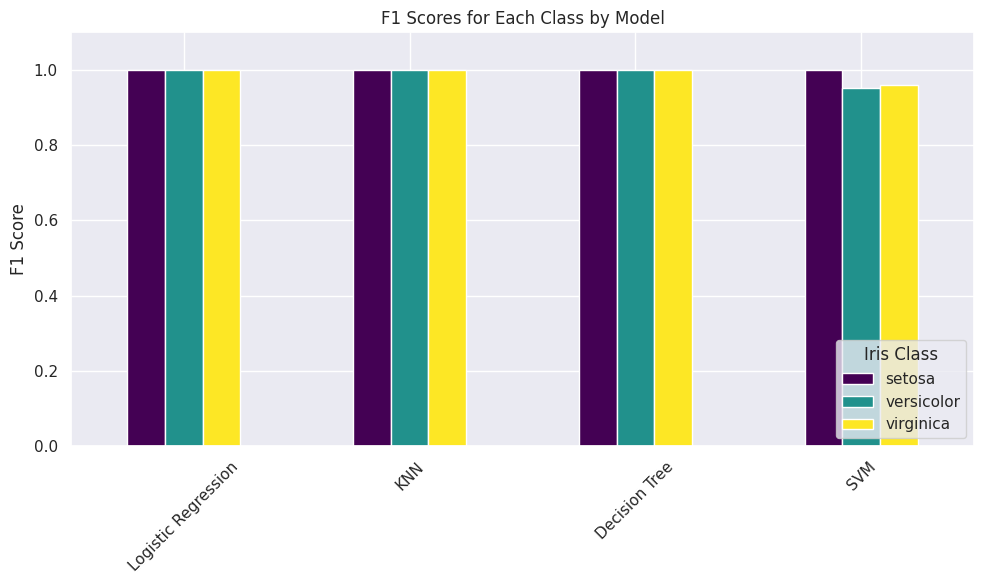

In [191]:
# Convert to DataFrame for easy plotting
f1_df = pd.DataFrame(f1_scores)

# Plot
f1_df.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title("F1 Scores for Each Class by Model")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
plt.xticks(rotation=45)
plt.legend(title="Iris Class", loc='lower right')
plt.tight_layout()
plt.show()


# 6️⃣ Save Models with pickle📦
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [192]:
import pickle

# Define path to your folder in Drive
save_path = '/content/drive/MyDrive/Colab Notebooks/IrisClassification/'

# Save models and scaler to your Drive
pickle.dump(log_reg, open(save_path + 'logistic_model.pkl', 'wb'))
pickle.dump(knn, open(save_path + 'knn_model.pkl', 'wb'))
pickle.dump(dtree, open(save_path + 'tree_model.pkl', 'wb'))
pickle.dump(svm, open(save_path + 'svm_model.pkl', 'wb'))
pickle.dump(scaler, open(save_path + 'scaler.pkl', 'wb'))

print("✅ Models saved to your Google Drive!")


✅ Models saved to your Google Drive!


## Load & Use Models Without Retraining

In [195]:
import os
# Define path to your folder in Drive
save_path = '/content/drive/MyDrive/Colab Notebooks/IrisClassification/'

# ✅ Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# ✅ Save models and scaler
with open(save_path + 'logistic_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

with open(save_path + 'knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

with open(save_path + 'tree_model.pkl', 'wb') as f:
    pickle.dump(dtree, f)

with open(save_path + 'svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

with open(save_path + 'scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ All models and the scaler have been saved to your Google Drive!")

✅ All models and the scaler have been saved to your Google Drive!


In [196]:
import pickle
import pandas as pd

# Mount Drive again (if starting a new session)
from google.colab import drive
drive.mount('/content/drive')

# Path to saved models
model_path = '/content/drive/MyDrive/Colab Notebooks/IrisClassification/'

# Load logistic model and scaler
with open(model_path + 'logistic_model.pkl', 'rb') as f:
    loaded_log = pickle.load(f)

with open(model_path + 'scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Input: New flower sample (as DataFrame with correct column names)
sample = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
)

# Scale and predict
scaled = loaded_scaler.transform(sample)
prediction = loaded_log.predict(scaled)

# Output prediction
print("✅ Prediction from Logistic Regression:", prediction[0])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Prediction from Logistic Regression: Iris-setosa


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

[![Open In Colab](https://colab.research.google.com/drive/1xW_LP7eqA25Dg9DMJW3YCdpxdTuNfTif?usp=sharing)](https://colab.research.google.com/drive/1xW_LP7eqA25Dg9DMJW3YCdpxdTuNfTif)
